In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from numpy.linalg import norm

In [3]:
from numbers import Real

class Moving_Point_Charge(object):
    
    # System spatial dimension
    dim = 3
    
    # light speed in atomic unit
    c = 1.0 / 0.0072973525693
    
    def __init__(self, q, rs, vs):
        for _arg in (rs, vs): assert callable(_arg)
        assert isinstance(q, Real)
        self.q, self.rs, self.vs = q, rs, vs
        
    
    def scalarpot_xyz(self, xyz, t):
        """
        Evaluate Liénard–Wiechert scalar potential 
        at given space-time point(s) in atomic unit
        """
        try: _rs,_vs,_xyz = (np.array(_o) for _o in (rs(t),vs(t),xyz))
#         try: _rs, _vs, _xyz = np.array(self.rs(t)), np.array(self.vs(t)), np.array(xyz)
        except: raise TypeError("Wrong type of `rs` or `vs`")
        for _obj in (_rs, _vs): assert _obj.shape == (self.dim,)
            
        _beta = _vs / self.c  # velocity relative to the light speed
        _rela_xyz = _xyz - _rs
        _dist = np.sqrt(np.square(_rela_xyz).sum(axis=-1))
        assert np.all(_dist > 0)
        
        _denom = _dist - (_rela_xyz * _beta).sum(axis=-1)
        _pot = self.q / _denom  # in atomic unit
        return _pot
    
    
    def scalarpot(self, x, y, z, t):
        try: _xyz = np.moveaxis(np.array((x,y,z)), 0, -1)
        except: raise Exception("Failed to construct coordinates array")
        return self.scalarpot_xyz(_xyz, t)

In [4]:
rs = lambda t: (1,0,0)
vs = lambda t: (0,0,0)
q1 = Moving_Point_Charge(1.0, rs, vs)

In [5]:
x_arr = np.linspace(-2,2,51)
y_arr = np.linspace(-1,1,41)

x_grid, y_grid = np.meshgrid(x_arr, y_arr, indexing='ij')
z_grid = np.zeros_like(x_grid)

In [6]:
scalpot_grid = q1.scalarpot(x_grid, y_grid, z_grid, t=0.0)

In [7]:
from vis.plot import construct_catesian_mesh_for_pcolormesh
x_color_grid, y_color_grid = construct_catesian_mesh_for_pcolormesh(x_arr, y_arr)
z_color_grid = np.zeros_like(x_grid)

In [8]:
vmax = np.quantile(scalpot_grid, 0.95)
vmin = np.quantile(scalpot_grid, 0.05)
from matplotlib.colors import Normalize
norm = Normalize(vmin, vmax)

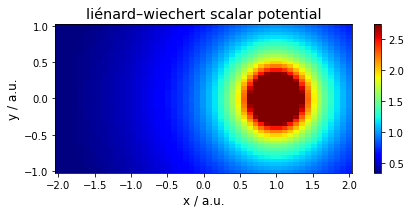

In [9]:
fig, ax = plt.subplots(figsize=(7,3))
quad = ax.pcolormesh(x_color_grid, y_color_grid, scalpot_grid, 
                     cmap='jet', norm=norm)
ax.set_aspect(1.0)
ax.set_xlabel("x / a.u."), ax.set_ylabel("y / a.u.")
ax.set_title("liénard–wiechert scalar potential")
cb = fig.colorbar(quad, ax=ax)
fig.tight_layout()
# fig.savefig("scalarpot-test-0.png")